# Pirinç Tipi Sınıflandırma

### Veri Seti

https://www.kaggle.com/datasets/mssmartypants/rice-type-classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score

In [2]:
dataset = pd.read_csv("riceClassification.csv")
dataset

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
18180,18181,5853,148.624571,51.029281,0.939210,6008,86.326537,0.498594,332.960,0.663444,2.912535,0
18181,18182,7585,169.593996,58.141659,0.939398,7806,98.272692,0.647461,385.506,0.641362,2.916910,0
18182,18183,6365,154.777085,52.908085,0.939760,6531,90.023162,0.561287,342.253,0.682832,2.925396,0
18183,18184,5960,151.397924,51.474600,0.940427,6189,87.112041,0.492399,343.371,0.635227,2.941216,0


In [3]:
dataset.drop("id", axis=1, inplace=True)
dataset

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1
...,...,...,...,...,...,...,...,...,...,...,...
18180,5853,148.624571,51.029281,0.939210,6008,86.326537,0.498594,332.960,0.663444,2.912535,0
18181,7585,169.593996,58.141659,0.939398,7806,98.272692,0.647461,385.506,0.641362,2.916910,0
18182,6365,154.777085,52.908085,0.939760,6531,90.023162,0.561287,342.253,0.682832,2.925396,0
18183,5960,151.397924,51.474600,0.940427,6189,87.112041,0.492399,343.371,0.635227,2.941216,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             18185 non-null  int64  
 1   MajorAxisLength  18185 non-null  float64
 2   MinorAxisLength  18185 non-null  float64
 3   Eccentricity     18185 non-null  float64
 4   ConvexArea       18185 non-null  int64  
 5   EquivDiameter    18185 non-null  float64
 6   Extent           18185 non-null  float64
 7   Perimeter        18185 non-null  float64
 8   Roundness        18185 non-null  float64
 9   AspectRation     18185 non-null  float64
 10  Class            18185 non-null  int64  
dtypes: float64(8), int64(3)
memory usage: 1.5 MB


In [5]:
dataset.isna().sum(axis=0)

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Perimeter          0
Roundness          0
AspectRation       0
Class              0
dtype: int64

In [6]:
y = dataset["Class"]
y

0        1
1        1
2        1
3        1
4        1
        ..
18180    0
18181    0
18182    0
18183    0
18184    0
Name: Class, Length: 18185, dtype: int64

In [7]:
print("Gonen(0) sınıfına ait veri sayısı =", y[y==0].count())
print("Jasmine(1) sınıfına ait veri sayısı =", y[y==1].count())

Gonen(0) sınıfına ait veri sayısı = 8200
Jasmine(1) sınıfına ait veri sayısı = 9985


In [8]:
X = dataset.drop("Class", axis=1)
X

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation
0,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796
1,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137
2,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950
3,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456
4,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000
...,...,...,...,...,...,...,...,...,...,...
18180,5853,148.624571,51.029281,0.939210,6008,86.326537,0.498594,332.960,0.663444,2.912535
18181,7585,169.593996,58.141659,0.939398,7806,98.272692,0.647461,385.506,0.641362,2.916910
18182,6365,154.777085,52.908085,0.939760,6531,90.023162,0.561287,342.253,0.682832,2.925396
18183,5960,151.397924,51.474600,0.940427,6189,87.112041,0.492399,343.371,0.635227,2.941216


In [9]:
X = X.values
y = y.values

In [10]:
X

array([[4.53700000e+03, 9.22293165e+01, 6.40127687e+01, ...,
        2.73085000e+02, 7.64509614e-01, 1.44079562e+00],
       [2.87200000e+03, 7.46918807e+01, 5.14004545e+01, ...,
        2.08317000e+02, 8.31658201e-01, 1.45313658e+00],
       [3.04800000e+03, 7.62931638e+01, 5.20434911e+01, ...,
        2.10012000e+02, 8.68433574e-01, 1.46595015e+00],
       ...,
       [6.36500000e+03, 1.54777085e+02, 5.29080845e+01, ...,
        3.42253000e+02, 6.82831810e-01, 2.92539573e+00],
       [5.96000000e+03, 1.51397924e+02, 5.14745998e+01, ...,
        3.43371000e+02, 6.35226924e-01, 2.94121614e+00],
       [6.13400000e+03, 1.53081981e+02, 5.15906056e+01, ...,
        3.38613000e+02, 6.72274101e-01, 2.96724528e+00]])

In [11]:
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 12)

In [13]:
print("Eğitim verileri =", X_train.shape)
print("Eğitim etiketleri =", y_train.shape)
print("Test verileri =", X_test.shape)
print("Test etiketleri =", y_test.shape)

Eğitim verileri = (12729, 10)
Eğitim etiketleri = (12729,)
Test verileri = (5456, 10)
Test etiketleri = (5456,)


In [14]:
print("Eğitim için Gonen(0) sınıfına ait veri sayısı =", len(y_train[y_train==0]))
print("Eğitim için Jasmine(1) sınıfına ait veri sayısı =", len(y_train[y_train==1]))
print("Test için Gonen(0) sınıfına ait veri sayısı =", len(y_test[y_test==0]))
print("Test için Jasmine(1) sınıfına ait veri sayısı =", len(y_test[y_test==1]))

Eğitim için Gonen(0) sınıfına ait veri sayısı = 5737
Eğitim için Jasmine(1) sınıfına ait veri sayısı = 6992
Test için Gonen(0) sınıfına ait veri sayısı = 2463
Test için Jasmine(1) sınıfına ait veri sayısı = 2993


In [15]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [32]:
X_train

array([[-0.53724525,  0.02968732, -0.67437183, ..., -0.52031318,
        -0.20407434,  0.61889147],
       [ 1.04060314,  0.6260954 ,  0.95325227, ...,  0.8529531 ,
         0.75146581, -0.69666354],
       [-0.01242881,  1.49280744, -0.64923203, ...,  0.70501651,
        -1.0719432 ,  1.36806487],
       ...,
       [-0.46042627,  0.57256434, -0.80255214, ...,  0.06374336,
        -1.01807687,  1.0821048 ],
       [-0.53520581,  0.23873699, -0.77275524, ..., -0.26336353,
        -0.65012468,  0.85894356],
       [ 1.22755201,  0.57152248,  1.21155786, ...,  0.97782013,
         0.88927247, -0.9091311 ]])

In [16]:
results = []

## Decision Tree Classifier

In [17]:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
results.append(["Decision Tree Classifier", confusion_matrix(y_test, y_pred), accuracy_score(y_test, y_pred), recall_score(y_test, y_pred), precision_score(y_test, y_pred), f1_score(y_test, y_pred)])

## K-Nearest Neighbors (K-NN)

In [18]:
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
results.append(["K-Nearest Neighbors (K-NN)", confusion_matrix(y_test, y_pred), accuracy_score(y_test, y_pred), recall_score(y_test, y_pred), precision_score(y_test, y_pred), f1_score(y_test, y_pred)])

C:\Users\eyupcan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


## Gaussian Naive Bayes

In [19]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
results.append(["Gaussian Naive Bayes", confusion_matrix(y_test, y_pred), accuracy_score(y_test, y_pred), recall_score(y_test, y_pred), precision_score(y_test, y_pred), f1_score(y_test, y_pred)])

## Random Forest Classifier

In [20]:
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
results.append(["Random Forest Classifier", confusion_matrix(y_test, y_pred), accuracy_score(y_test, y_pred), recall_score(y_test, y_pred), precision_score(y_test, y_pred), f1_score(y_test, y_pred)])

## RBF SVM

In [21]:
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
results.append(["RBF SVM", confusion_matrix(y_test, y_pred), accuracy_score(y_test, y_pred), recall_score(y_test, y_pred), precision_score(y_test, y_pred), f1_score(y_test, y_pred)])

## Linear SVM

In [22]:
classifier = LinearSVC(C=0.0001)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
results.append(["Linear SVM", confusion_matrix(y_test, y_pred), accuracy_score(y_test, y_pred), recall_score(y_test, y_pred), precision_score(y_test, y_pred), f1_score(y_test, y_pred)])

## Logistic Regression

In [23]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
results.append(["Logistic Regression", confusion_matrix(y_test, y_pred), accuracy_score(y_test, y_pred), recall_score(y_test, y_pred), precision_score(y_test, y_pred), f1_score(y_test, y_pred)])

## Linear Discriminant Analysis

In [24]:
classifier = LinearDiscriminantAnalysis()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
results.append(["Linear Discriminant Analysis", confusion_matrix(y_test, y_pred), accuracy_score(y_test, y_pred), recall_score(y_test, y_pred), precision_score(y_test, y_pred), f1_score(y_test, y_pred)])

## AdaBoost Classifier

In [25]:
classifier = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
results.append(["AdaBoost Classifier", confusion_matrix(y_test, y_pred), accuracy_score(y_test, y_pred), recall_score(y_test, y_pred), precision_score(y_test, y_pred), f1_score(y_test, y_pred)])

## Gradient Boosting Classifier

In [26]:
classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
results.append(["Gradient Boosting Classifier", confusion_matrix(y_test, y_pred), accuracy_score(y_test, y_pred), recall_score(y_test, y_pred), precision_score(y_test, y_pred), f1_score(y_test, y_pred)])

## Extra-Trees Classifier

In [27]:
classifier = ExtraTreesClassifier(n_estimators=5000, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
results.append(["Extra-Trees Classifier", confusion_matrix(y_test, y_pred), accuracy_score(y_test, y_pred), recall_score(y_test, y_pred), precision_score(y_test, y_pred), f1_score(y_test, y_pred)])

## Multi Layer Perceptron Classifier

In [28]:
classifier = MLPClassifier(max_iter=300)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
results.append(["Multi Layer Perceptron Classifier", confusion_matrix(y_test, y_pred), accuracy_score(y_test, y_pred), recall_score(y_test, y_pred), precision_score(y_test, y_pred), f1_score(y_test, y_pred)])

In [29]:
template = "{}  -  Accuracy:{:.4}  -  Recall:{:.4}  -  Precision:{:.4}  -  F1 Score:{:.4}"

In [30]:
for name, cm, acc, rec, pre, f1 in results:
    print("----------------------------------------------------------------------------------------------")
    print()
    print(name)
    print(template.format(cm, acc, rec, pre, f1))
    print()

----------------------------------------------------------------------------------------------

Decision Tree Classifier
[[2421   42]
 [  59 2934]]  -  Accuracy:0.9815  -  Recall:0.9803  -  Precision:0.9859  -  F1 Score:0.9831

----------------------------------------------------------------------------------------------

K-Nearest Neighbors (K-NN)
[[2427   36]
 [  30 2963]]  -  Accuracy:0.9879  -  Recall:0.99  -  Precision:0.988  -  F1 Score:0.989

----------------------------------------------------------------------------------------------

Gaussian Naive Bayes
[[2379   84]
 [   7 2986]]  -  Accuracy:0.9833  -  Recall:0.9977  -  Precision:0.9726  -  F1 Score:0.985

----------------------------------------------------------------------------------------------

Random Forest Classifier
[[2432   31]
 [  32 2961]]  -  Accuracy:0.9885  -  Recall:0.9893  -  Precision:0.9896  -  F1 Score:0.9895

----------------------------------------------------------------------------------------------


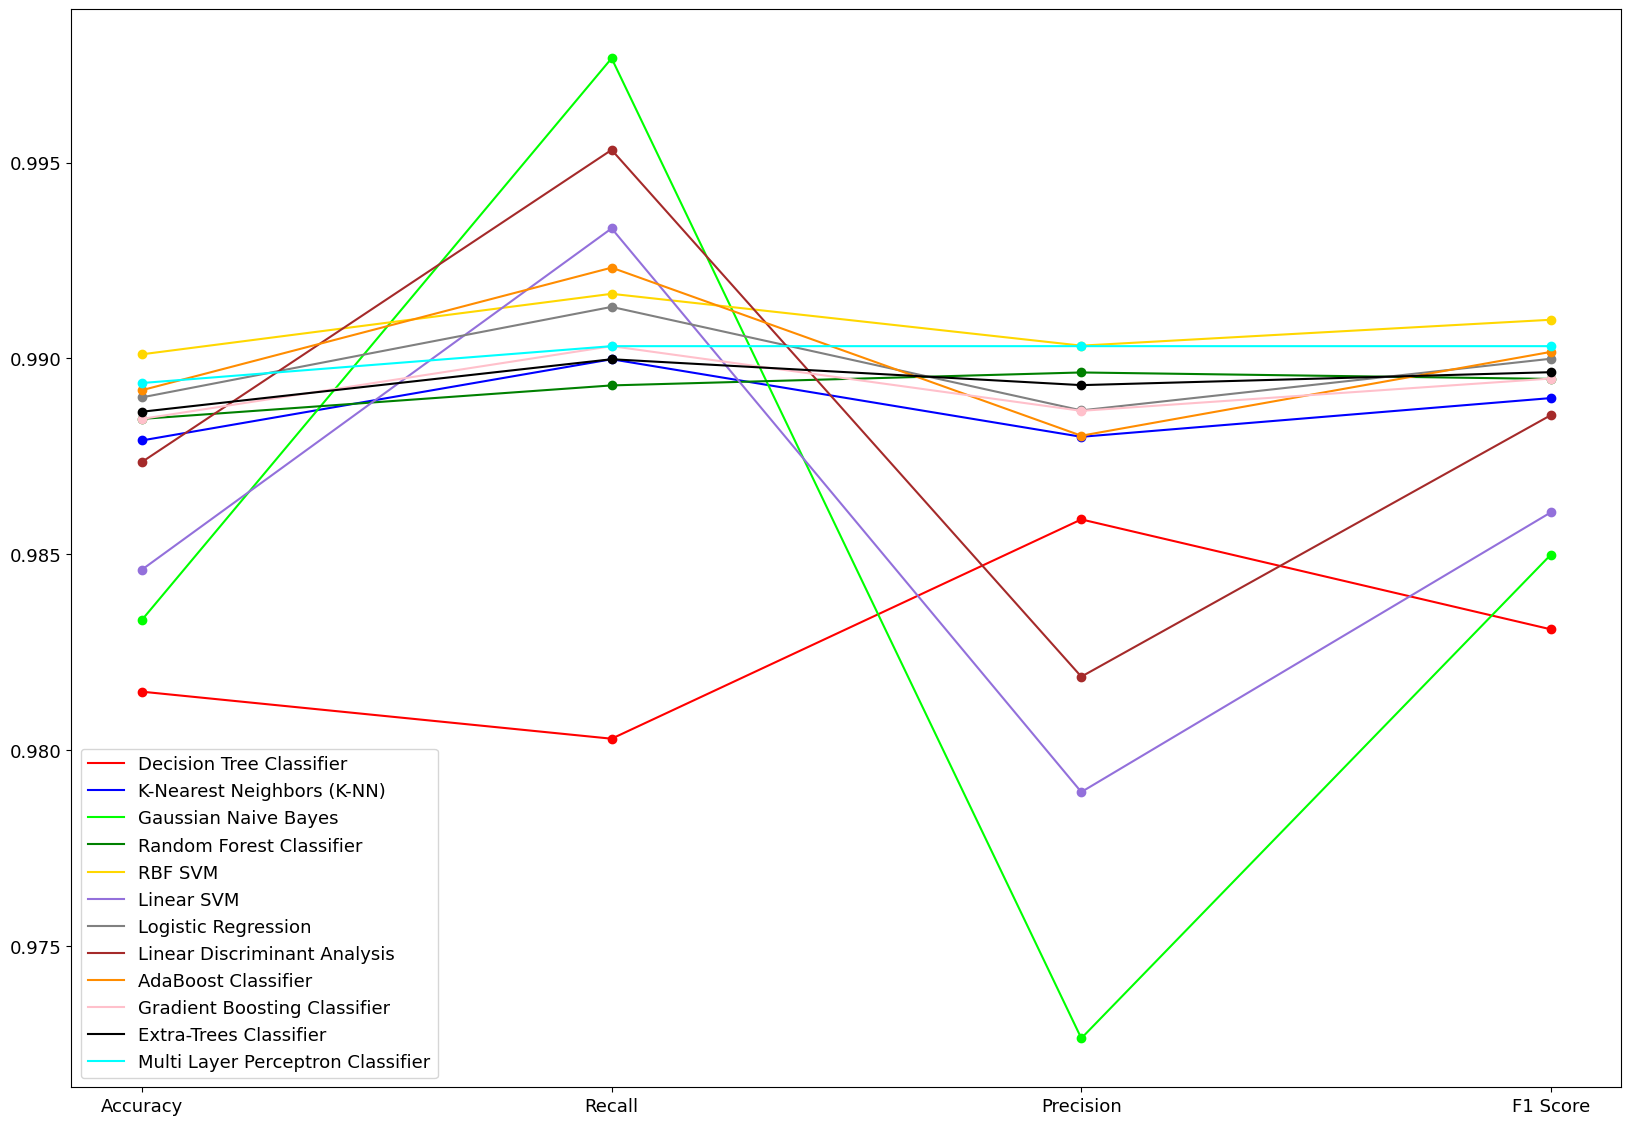

In [31]:
colors = ['red', 'blue', 'lime', 'green', 'gold', 'mediumpurple', 'grey', 'brown', 'darkorange', 'pink', 'black', 'cyan']
sayac=0
plt.figure(figsize=(20, 14))
plt.rcParams['font.size'] = '13'
for name, cm, acc, rec, pre, f1 in results:
    plt.plot([0,1,2,3], [acc,rec,pre,f1], color=colors[sayac], label= name)
    plt.plot([0,1,2,3], [acc,rec,pre,f1], "o", color=colors[sayac])
    plt.xticks([0,1,2,3], ["Accuracy","Recall","Precision","F1 Score"])
    plt.legend()
    sayac += 1